<a href="https://colab.research.google.com/github/Abdullah-AlOwais/Tuwaiq/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 206MB/s]


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()
#only numeric fields are returned.

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
df.describe(exclude=[np.number])
#Exclude numeric fields.

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
count,147972,147883,147972,147884,147870,147972,147972,147972,141654,147972,126342,147972,147972,147972,147972,5632,147972,147972,147972
unique,4,10,10765,11283,10,5180,70108,75822,11,91,1863,2,2,2,75822,4666,145769,2,2
top,2016-2017,Special Ed AM Run,9354,1,Heavy Traffic,C814,01/25/2016 07:30:00 AM,01/26/2016 07:57:00 AM,Bronx,"G.V.C., LTD.",20 MINS,Yes,Yes,No,01/26/2016 07:57:00 AM,x,12/20/2016 02:31:32 PM,Running Late,School-Age
freq,83141,85990,468,2569,87426,1735,39,19,40995,14198,5662,139127,113098,101355,19,113,4,130857,127003


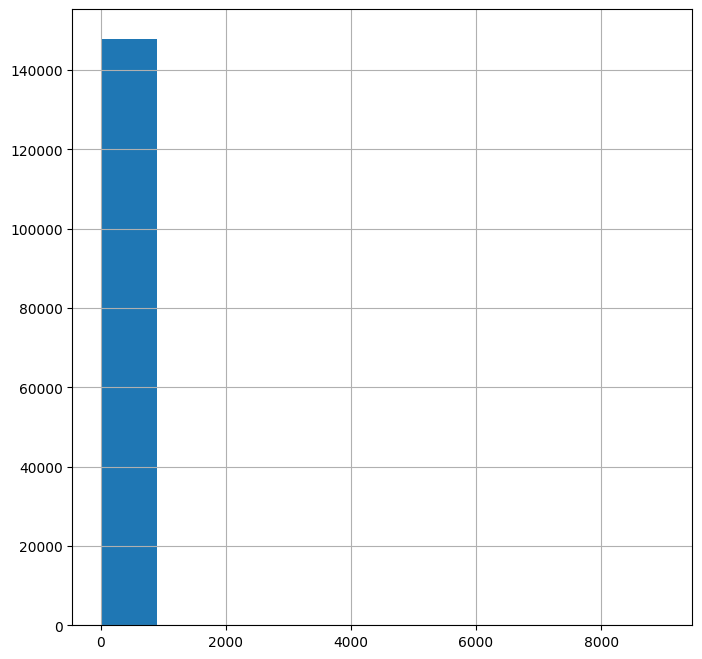

In [ ]:
df['Number_Of_Students_On_The_Bus'].hist(figsize=(8, 8))
plt.show()

<Axes: xlabel='Number_Of_Students_On_The_Bus'>

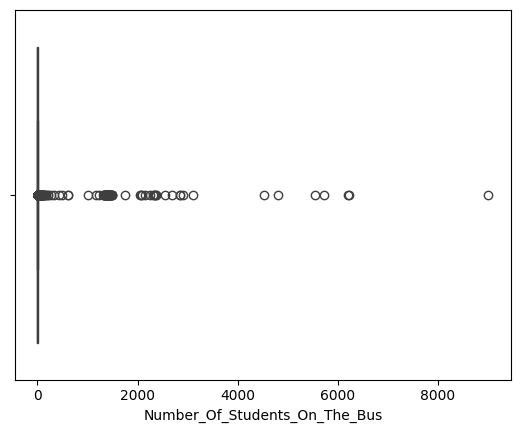

In [ ]:
sns.boxplot(x=df["Number_Of_Students_On_The_Bus"])

In [ ]:
#checking any values out of the ordinary
for i in df.columns:
      print('column name: ',i)
      print(df[i].unique())
      print('\n----------------------------------------------\n')

column name:  School_Year
['2015-2016' '2016-2017' '2017-2018' '2019-2020']

----------------------------------------------

column name:  Busbreakdown_ID
[1224901 1225098 1215800 ... 1353044 1353045 1353046]

----------------------------------------------

column name:  Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']

----------------------------------------------

column name:  Bus_No
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']

----------------------------------------------

column name:  Route_Number
['1' '2' 'P640' ... '012' '29AM' '1409B']

----------------------------------------------

column name:  Reason
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]

-------------------

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
#df[i].isnull() -> to check if there any 'null' value'
#replace the Null and then replace it with the mode
for i in df.columns:
      print('The null Value in (',i,') is = ',df[i].isnull().sum())
      df[i].fillna(df[i].mode()[0],inplace=True)
      print(i,' mode= ',df[i].mode()[0])
      print('The null Value in (',i,') after filling is = ',df[i].isnull().sum())
      print('\n----------------------------------------------\n')

The null Value in ( School_Year ) is =  0
School_Year  mode=  2016-2017
The null Value in ( School_Year ) after filling is =  0

----------------------------------------------

The null Value in ( Busbreakdown_ID ) is =  0
Busbreakdown_ID  mode=  1212681
The null Value in ( Busbreakdown_ID ) after filling is =  0

----------------------------------------------

The null Value in ( Run_Type ) is =  89
Run_Type  mode=  Special Ed AM Run
The null Value in ( Run_Type ) after filling is =  0

----------------------------------------------

The null Value in ( Bus_No ) is =  0
Bus_No  mode=  9354
The null Value in ( Bus_No ) after filling is =  0

----------------------------------------------

The null Value in ( Route_Number ) is =  88
Route_Number  mode=  1
The null Value in ( Route_Number ) after filling is =  0

----------------------------------------------

The null Value in ( Reason ) is =  102
Reason  mode=  Heavy Traffic
The null Value in ( Reason ) after filling is =  0

---------

In [ ]:
df=df.drop(['Incident_Number'], axis=1)

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df=remove_outliers(df,'Number_Of_Students_On_The_Bus')


<Axes: xlabel='Number_Of_Students_On_The_Bus'>

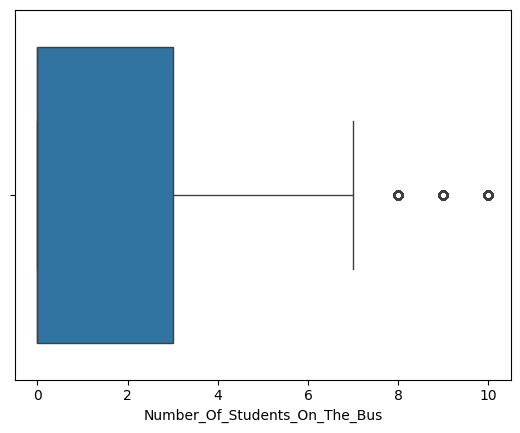

In [ ]:
sns.boxplot(x=df["Number_Of_Students_On_The_Bus"])

In [ ]:
object_col = df.select_dtypes(include=['object']).columns


In [ ]:
le = LabelEncoder()

for i in object_col:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140298 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      140298 non-null  int64
 1   Busbreakdown_ID                  140298 non-null  int64
 2   Run_Type                         140298 non-null  int64
 3   Bus_No                           140298 non-null  int64
 4   Route_Number                     140298 non-null  int64
 5   Reason                           140298 non-null  int64
 6   Schools_Serviced                 140298 non-null  int64
 7   Occurred_On                      140298 non-null  int64
 8   Created_On                       140298 non-null  int64
 9   Boro                             140298 non-null  int64
 10  Bus_Company_Name                 140298 non-null  int64
 11  How_Long_Delayed                 140298 non-null  int64
 12  Number_Of_Students_On_The_Bus    14

In [ ]:
scaler = StandardScaler()
std=scaler.fit_transform(df)

In [ ]:
std.shape

(140298, 20)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X=df.drop(['Breakdown_or_Running_Late'], axis=1)
y=df['Breakdown_or_Running_Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(140298, 19)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(19, input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           2,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           3,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 40)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [ ]:
performance=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.15, verbose=1)

Epoch 1/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8793 - loss: 10.4288 - val_accuracy: 0.8802 - val_loss: 0.3704
Epoch 2/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8815 - loss: 0.3654 - val_accuracy: 0.8802 - val_loss: 0.3666
Epoch 3/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8818 - loss: 0.3633 - val_accuracy: 0.8802 - val_loss: 0.3665
Epoch 4/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8830 - loss: 0.3609 - val_accuracy: 0.8802 - val_loss: 0.3665
Epoch 5/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8819 - loss: 0.3632 - val_accuracy: 0.8802 - val_loss: 0.3665
Epoch 6/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8802 - loss: 0.3665 - val_accuracy: 0.8802 - val_loss: 0.3666
Epoch 7/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8840 - loss: 0.3589 - val_accuracy: 0.8802 - val_loss: 0.3665
Epoch 8/10
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8824 - loss: 0.3

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8791 - loss: 0.3687


[0.3679749369621277, 0.879472553730011]

In [ ]:
unseen_data = [
    df['School_Year'].mode()[0],
    df['Busbreakdown_ID'].mode()[0],
    df['Run_Type'].mode()[0],
    df['Bus_No'].mode()[0],
    df['Route_Number'].mode()[0],
    df['Reason'].mode()[0],
    df['Schools_Serviced'].mode()[0],
    df['Occurred_On'].mode()[0],
    df['Created_On'].mode()[0],
    df['Boro'].mode()[0],
    df['Bus_Company_Name'].mode()[0],
    df['How_Long_Delayed'].mode()[0],
    df['Number_Of_Students_On_The_Bus'].mode()[0],
    df['Has_Contractor_Notified_Schools'].mode()[0],
    df['Has_Contractor_Notified_Parents'].mode()[0],
    df['Have_You_Alerted_OPT'].mode()[0],
    df['Informed_On'].mode()[0],
    df['Last_Updated_On'].mode()[0],
    df['Breakdown_or_Running_Late'].mode()[0]
]

unseen_df = pd.DataFrame([unseen_data], columns=[
    'School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
    'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
    'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
    'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
    'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
    'Breakdown_or_Running_Late'
])

unseen_data_array = unseen_df.values
unseen_data_array

array([[      1, 1212681,       7,    4606,      76,       3,    4986,
           5237,    6160,       1,      69,     596,       0,       1,
              1,       0,    6160,   91897,       1]])

In [ ]:
model.predict(unseen_data_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.8787324]], dtype=float32)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
model.predict(X_test)

877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.8787324],
       [0.8787324],
       [0.8787324],
       ...,
       [0.8787324],
       [0.8787324],
       [0.8787324]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

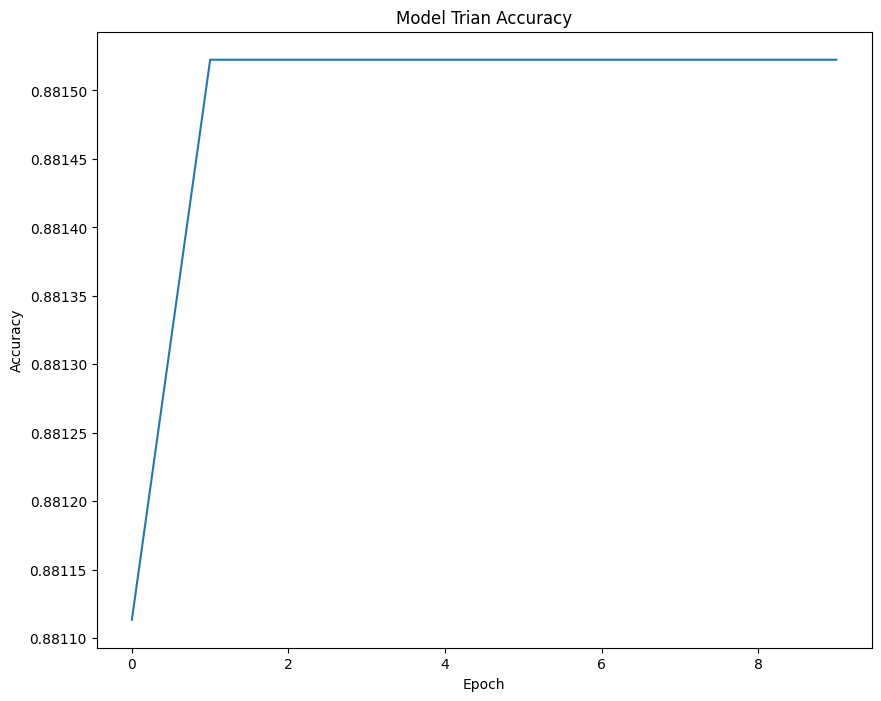

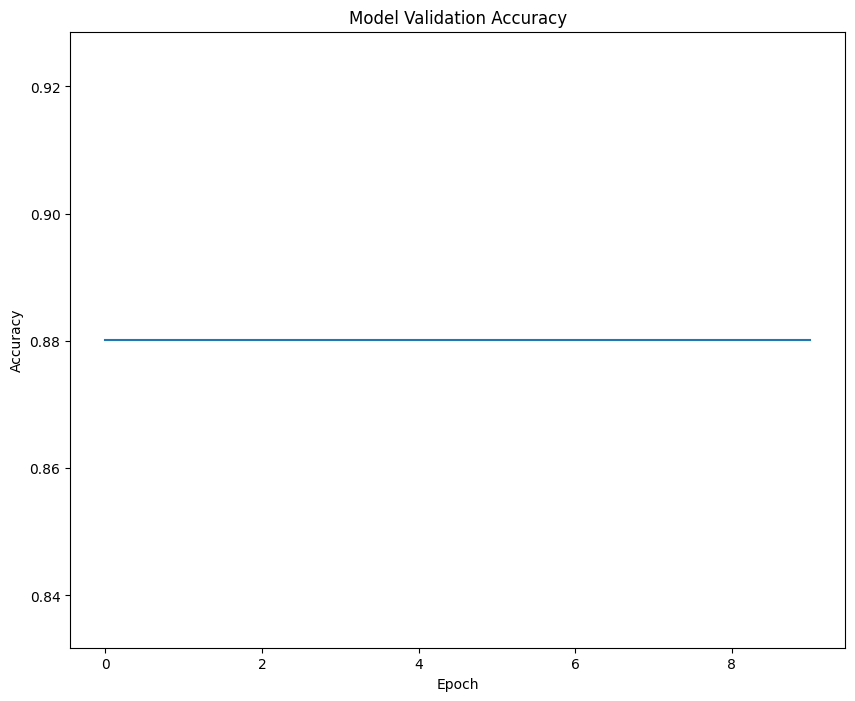

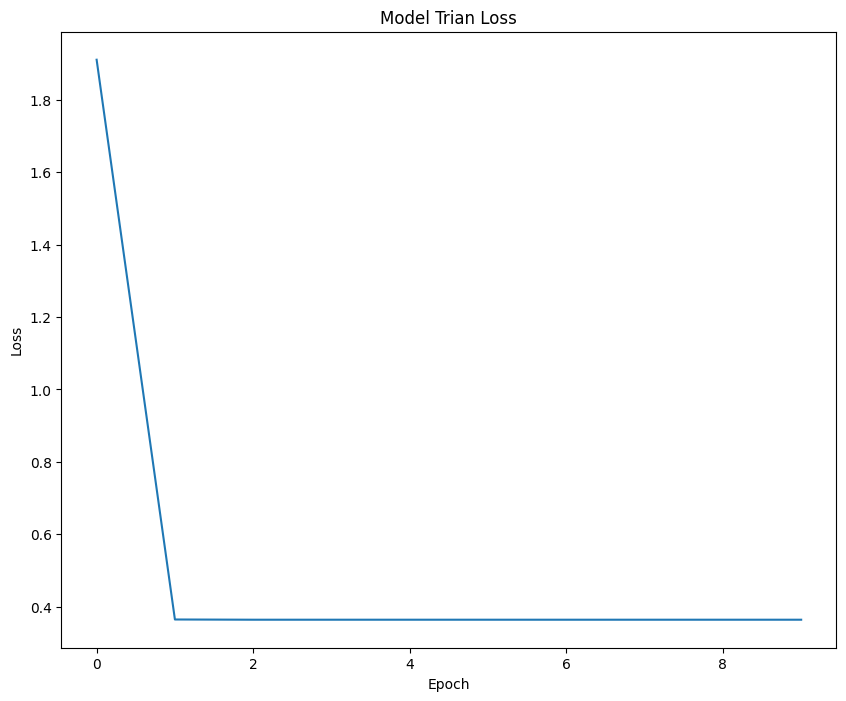

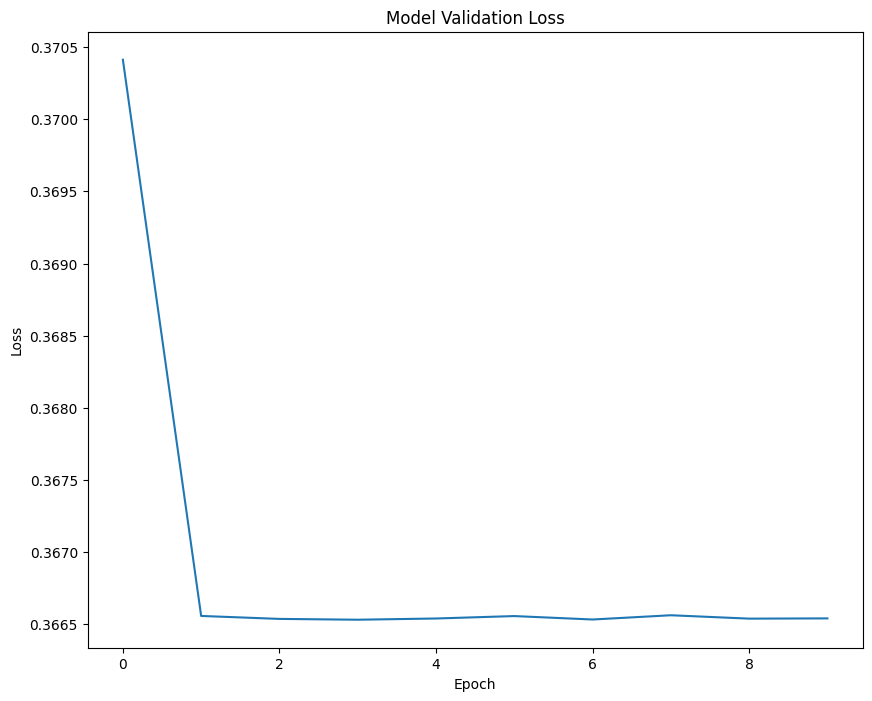

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(performance.history['accuracy'], label='Train Accuracy')
plt.title('Model Trian Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(performance.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(performance.history['loss'], label='Train Loss')
plt.title('Model Trian Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(performance.history['val_loss'], label='Validation Loss')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



## Save the Model
Save the trained model for submission.

In [ ]:
model.save('save_model/model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
1. Noticed that here are outlier on student on bus
2.
3.
4.because it's binry classification
5.
6.
7.
8.
9. no i didn't